# Star Wars Survey

<h4>Columns</h4>
- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

In [1]:
import pandas as pd
import numpy as np
#import data with correct encoding
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
#initial examination of the Data
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
#look at columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
#removing rows where RespondentID is NaN
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [5]:
#converting values of columns with Yes/No answers to Booleans
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

#verify it worked

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']


1        True
2         NaN
3       False
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11        NaN
12        NaN
13      False
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22      False
23       True
24       True
25       True
26        NaN
27       True
28       True
29       True
30       True
        ...  
1157    False
1158      NaN
1159    False
1160      NaN
1161    False
1162    False
1163     True
1164    False
1165    False
1166     True
1167     True
1168    False
1169      NaN
1170     True
1171      NaN
1172     True
1173     True
1174     True
1175    False
1176     True
1177    False
1178    False
1179      NaN
1180     True
1181     True
1182     True
1183     True
1184      NaN
1185     True
1186    False
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, Length: 1186, dtype: object

In [6]:
#create mapping Dictionary
rename_values = {
    "Star Wars: Episode I  The Phantom Menace": True,
    'Star Wars: Episode II  Attack of the Clones': True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,    
    np.NaN: False
}
#Map values to bools for each column 
for val in range(3,9):
    star_wars.iloc[:,val] = star_wars.iloc[:,val].map(rename_values)
#verify that it worked
star_wars.iloc[:,3:9]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [7]:
#rename columns to be more intuitive
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
})
#verify that it worked
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [8]:
#converting values in columns 9-14 to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
#giving the columns 9-14 a more descriptive name
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6',
})
#verify it worked
star_wars.iloc[:,9:15]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


In [9]:
#get mean of the ranking columns
means = star_wars.iloc[:,9:15].mean()

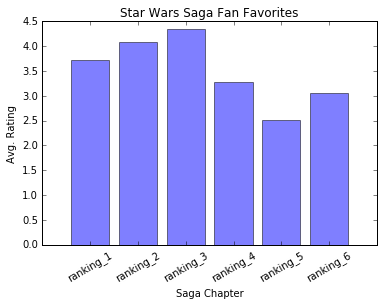

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

names = [rank for rank in means.index]
mean = [mean for mean in means]
y_pos = np.arange(len(names))

plt.bar(y_pos, mean, align='center', alpha=0.5)
plt.xticks(y_pos, names, rotation=30)
plt.ylabel('Avg. Rating')
plt.xlabel('Saga Chapter')
plt.title('Star Wars Saga Fan Favorites')

<h4>Explanation of Results</h4>
The graph here shows the avg. rating of each film in the Star Wars Sage from The Phantom Menace (ranking_1) to The Return of the Jedi (ranking_6). The avg. rating was calculated on a scale of 1 to 6, with 1 being the favorite film and 6 being the least favorite film. Thus, a lower score means that the film is better according to fans.

The distribution shows a clear preference for the older films in the saga, with The Empire Strikes Back being the favorite. This is likely because in the newer films, just like Obi Wan Kenobi could not prevent Anakin Skywalker from joining the dark side, Ewan McGregor's solid acting could not offset Hayden Christensen's complete bomb of a performance (alongside numerous other factors), whereas the older films have a charm and nostalgia that will not soon be forgotten.

# What are the Most Watched Films in the Saga

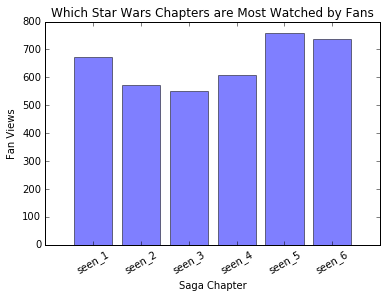

In [14]:
seen_sum = star_wars[star_wars.columns[3:9]].sum()
names2 = [name for name in seen_sum.index]
sums = [sums for sums in seen_sum]
y_pos = np.arange(len(names2))

plt.bar(y_pos, sums, align='center', alpha=0.5)
plt.xticks(y_pos, names2, rotation=30)
plt.ylabel('Fan Views')
plt.xlabel('Saga Chapter')
plt.title('Which Star Wars Chapters are Most Watched by Fans')


# Responses By Demographic

<h4>Male vs. Female</h4>

In [15]:
#split df into male and female
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

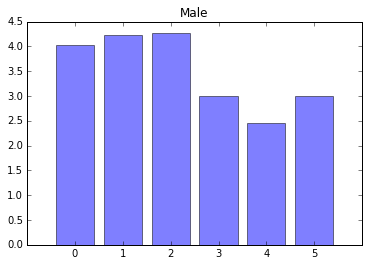

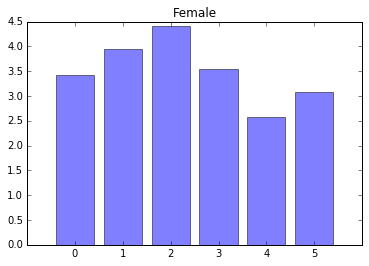

In [41]:
# get the means of both and plot
plt.bar(range(6), males[males.columns[9:15]].mean(), align='center', alpha = 0.5)
plt.title('Male Favorite Films')
plt.xticks(np.arange(6))
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean(), align='center', alpha = 0.5)
plt.title('Female Favorite Films')
plt.xticks(np.arange(6))
plt.show()

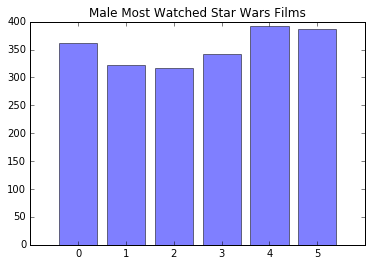

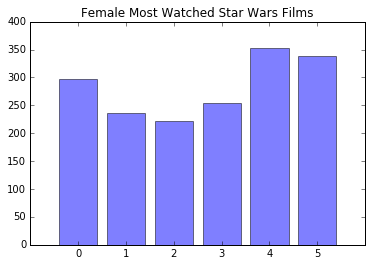

In [42]:
#sum and plot views
plt.bar(range(6), males[males.columns[3:9]].sum(), align='center', alpha = 0.5)
plt.title('Male Most Watched Star Wars Films')
plt.xticks(np.arange(6))
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum(), align='center', alpha = 0.5)
plt.title('Female Most Watched Star Wars Films')
plt.xticks(np.arange(6))
plt.show()

<h4>Fans vs. Non Fans</h4>

In [50]:
#split df into fans and non fans
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

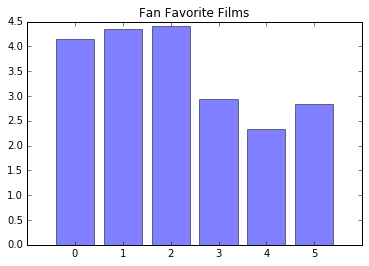

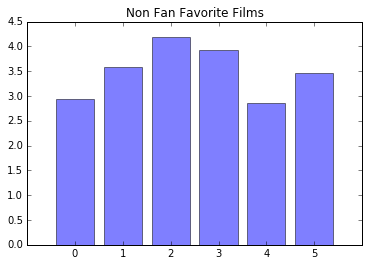

In [51]:
# get the means of both
plt.bar(range(6), fans[fans.columns[9:15]].mean(), align='center', alpha = 0.5)
plt.title('Fan Favorite Films')
plt.xticks(np.arange(6))
plt.show()

plt.bar(range(6), non_fans[non_fans.columns[9:15]].mean(), align='center', alpha = 0.5)
plt.title('Non Fan Favorite Films')
plt.xticks(np.arange(6))
plt.show()

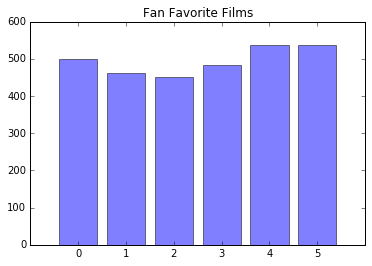

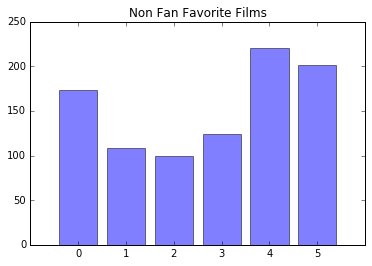

In [52]:
plt.bar(range(6), fans[fans.columns[3:9]].sum(), align='center', alpha = 0.5)
plt.title('Fan Favorite Films')
plt.xticks(np.arange(6))
plt.show()

plt.bar(range(6), non_fans[non_fans.columns[3:9]].sum(), align='center', alpha = 0.5)
plt.title('Non Fan Favorite Films')
plt.xticks(np.arange(6))
plt.show()

<h4>Star Trek Fans vs. Non Fans</h4>

In [19]:
#split df into Star Trek fans and non fans
st_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == True]
non_st_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == False]

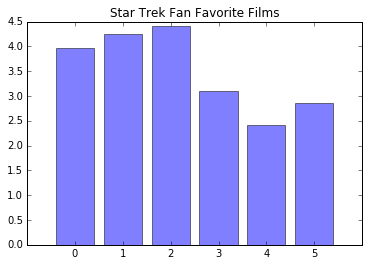

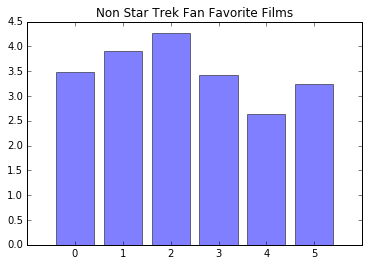

In [56]:
# get the means and plot
plt.bar(range(6), st_fans[st_fans.columns[9:15]].mean(), align='center', alpha = 0.5)
plt.title('Star Trek Fan Favorite Films')
plt.xticks(np.arange(6))
plt.show()

plt.bar(range(6), non_st_fans[non_st_fans.columns[9:15]].mean(), align='center', alpha = 0.5)
plt.title('Non Star Trek Fan Favorite Films')
plt.xticks(np.arange(6))
plt.show()

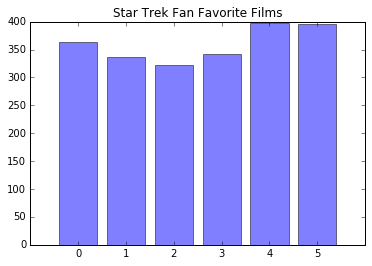

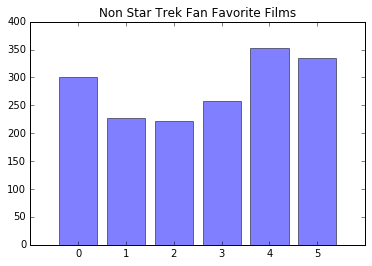

In [55]:
plt.bar(range(6), st_fans[st_fans.columns[3:9]].sum(), align='center', alpha = 0.5)
plt.title('Star Trek Fan Favorite Films')
plt.xticks(np.arange(6))
plt.show()

plt.bar(range(6), non_st_fans[non_st_fans.columns[3:9]].sum(), align='center', alpha = 0.5)
plt.title('Non Star Trek Fan Favorite Films')
plt.xticks(np.arange(6))
plt.show()